In [1]:
from tensorflow.keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10_000)

print(f"x-shape: {x_train.shape}")
print(f"y-shape: {y_train.shape}")

17473536/17464789 [==============================] - 0s 0us/step
x-shape: (25000,)
y-shape: (25000,)


In [2]:
from typing import Sequence
import numpy as np

def vectorize_seq(sequences, dimensions=10_000):
    results = np.zeros(shape=(len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [3]:
x_train = vectorize_seq(x_train)
x_test = vectorize_seq(x_test)

print(f"train shape: {x_train.shape}")
print(f"datapoint: {x_train[0]}")

train shape: (25000, 10000)
datapoint: [0. 1. 1. ... 0. 0. 0.]


In [5]:
# model without weight regularization
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Dense(16, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [6]:
res = model.fit(x_train,
                y_train,
                epochs=20,
                batch_size=512,
                validation_data=[x_test, y_test])

Epoch 1/20
49/49 [==============================] - 7s 57ms/step - loss: 0.4661 - accuracy: 0.8256 - val_loss: 0.3525 - val_accuracy: 0.8788
Epoch 2/20
49/49 [==============================] - 1s 28ms/step - loss: 0.2707 - accuracy: 0.9078 - val_loss: 0.2900 - val_accuracy: 0.8891
Epoch 3/20
49/49 [==============================] - 1s 26ms/step - loss: 0.2045 - accuracy: 0.9274 - val_loss: 0.2819 - val_accuracy: 0.8884
Epoch 4/20
49/49 [==============================] - 1s 26ms/step - loss: 0.1708 - accuracy: 0.9398 - val_loss: 0.3204 - val_accuracy: 0.8725
Epoch 5/20
49/49 [==============================] - 1s 27ms/step - loss: 0.1457 - accuracy: 0.9497 - val_loss: 0.3075 - val_accuracy: 0.8810
Epoch 6/20
49/49 [==============================] - 1s 29ms/step - loss: 0.1292 - accuracy: 0.9545 - val_loss: 0.3573 - val_accuracy: 0.8658
Epoch 7/20
49/49 [==============================] - 1s 29ms/step - loss: 0.1129 - accuracy: 0.9622 - val_loss: 0.3568 - val_accuracy: 0.8729
Epoch 8/20
49

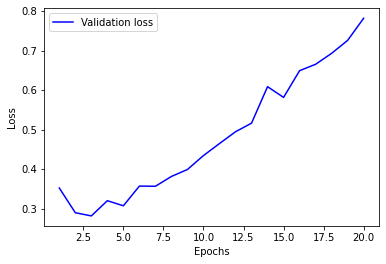

In [7]:
val_loss = res.history["val_loss"]
x_range = range(1, len(val_loss) +1)

import matplotlib.pyplot as plt
plt.plot(x_range, val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [10]:
# train model with l2 weight decay
from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(16, kernel_regularizer=l2(0.002), activation="relu"),
    Dense(16, kernel_regularizer=l2(0.002), activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [12]:
res_l2 = model.fit(x_train,
                   y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 56ms/step - loss: 0.6152 - accuracy: 0.7898 - val_loss: 0.5117 - val_accuracy: 0.8474
Epoch 2/20
49/49 [==============================] - 1s 27ms/step - loss: 0.4324 - accuracy: 0.8821 - val_loss: 0.4087 - val_accuracy: 0.8822
Epoch 3/20
49/49 [==============================] - 1s 27ms/step - loss: 0.3589 - accuracy: 0.8986 - val_loss: 0.3809 - val_accuracy: 0.8825
Epoch 4/20
49/49 [==============================] - 1s 27ms/step - loss: 0.3281 - accuracy: 0.9082 - val_loss: 0.3689 - val_accuracy: 0.8832
Epoch 5/20
49/49 [==============================] - 1s 27ms/step - loss: 0.3096 - accuracy: 0.9125 - val_loss: 0.3790 - val_accuracy: 0.8778
Epoch 6/20
49/49 [==============================] - 2s 32ms/step - loss: 0.2977 - accuracy: 0.9195 - val_loss: 0.3649 - val_accuracy: 0.8821
Epoch 7/20
49/49 [==============================] - 1s 27ms/step - loss: 0.2923 - accuracy: 0.9204 - val_loss: 0.3703 - val_accuracy: 0.8812
Epoch 8/20
49

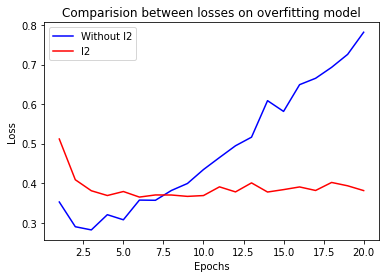

In [13]:
val_loss_l2 = res_l2.history["val_loss"]

plt.plot(x_range, val_loss, "b", label="Without l2")
plt.plot(x_range, val_loss_l2, "r", label="l2")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Comparision between losses on overfitting model")
plt.legend()
plt.show()